In [18]:
import os
import pandas as pd
import glob
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [19]:
# folders = os.listdir('models')
data_types = ['EEG', 'MOTION','EDA', 'PUPIL', 'GAZE']#'EYE', 
# folders

In [26]:
folder = '(4-2)(v3-param)11_01_2025-03_39_PM'
# folder = '(2-1)(v3-param)11_01_2025-05_14_PM'
# folder = '(1-0)(v3-param)11_01_2025-06_46_PM'
clfs = {}
for dt in data_types:
    file = glob.glob(f'models/{folder}/*-{dt}-*')[0]
    print(file)
    clf = pickle.load(open(file, 'rb'))
    clfs.update({dt: clf})
clf.keys()

models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-EEG-11_01_2025-04_15_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-MOTION-11_01_2025-04_29_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-EDA-11_01_2025-05_14_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-PUPIL-11_01_2025-04_44_PM.pkl
models/(4-2)(v3-param)11_01_2025-03_39_PM/SVM(6)-4-2-GAZE-11_01_2025-04_53_PM.pkl


dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true'])

In [27]:
for model in clfs['EEG']['estimator']:
    print(model.best_estimator_)

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=30,
                             score_func=<function mutual_info_classif at 0x7ff7c0c04400>)),
                ('classify', SVC(C=5, degree=4, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=25,
                             score_func=<function mutual_info_classi

EEG best estimator:
Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30, mutual_info_classif )),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])

In [28]:
scores = dict()
for key, clf in clfs.items():
    score = pd.DataFrame(
        {
            'test_ROC': clf['test_ROC'],
            'train_ROC': clf['train_ROC'],
            'test_Accuracy': clf['test_Accuracy'],
            'train_Accuracy': clf['train_Accuracy'],
            'test_F1-macro': clf['test_F1-macro'], 
            'train_F1-macro': clf['train_F1-macro']
        }
    )
    scores.update({key: score})
scores['EEG']

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
0,0.873327,0.983236,0.531915,0.937261,0.441667,0.939115
1,0.774007,0.989581,0.386364,0.938931,0.354530,0.941539
2,0.856507,0.993842,0.583333,0.985452,0.613847,0.985560
3,0.753461,0.994020,0.409091,0.940458,0.338228,0.942943
4,0.804867,0.986362,0.404255,0.905126,0.412402,0.907637
5,0.830811,0.991252,0.434783,0.955657,0.436840,0.956974
6,0.827527,0.995818,0.500000,0.964012,0.495140,0.965786
7,0.815500,0.983646,0.458333,0.890505,0.443811,0.894066
8,0.819596,0.992502,0.479167,0.954824,0.478022,0.954626
9,0.747001,0.986074,0.312500,0.879020,0.323605,0.880167


In [29]:
midx = {}
for key, val in scores.items():
    ary = val['test_F1-macro'].values
    idx = np.where(ary == max(ary))[0]
    midx[key] = idx[0]
    print(key, max(ary), idx)
    # ary -= val['train_F1-macro'].values
    # ary = abs(ary)
    # idx = np.where(ary == min(ary))[0]
    # print(key, min(ary), idx)
midx

EEG 0.6138474594236845 [2]
MOTION 0.7276190476190476 [16]
EDA 0.31222943722943725 [27]
PUPIL 0.7903169627307558 [11]
GAZE 0.6874458874458874 [21]


{'EEG': 2, 'MOTION': 16, 'EDA': 27, 'PUPIL': 11, 'GAZE': 21}

In [30]:
for key, clf in clfs.items():
    idx = midx[key]
    m = clf['estimator'][idx].best_estimator_
    print(key, m)

EEG Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
MOTION Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
                 SelectKBest(k=13,
                             score_func=<function mutual_info_classif at 0x7ff7c0c04400>)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
EDA Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', LinearDiscriminantAnalysis(n_components=3)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
PUPIL Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', NeighborhoodComponentsAnalysis(n_components=3)),
                ('classify',
                 SVC(C=1, degree=2, gamma=0.001, probability=True))])
GAZE Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim',
    

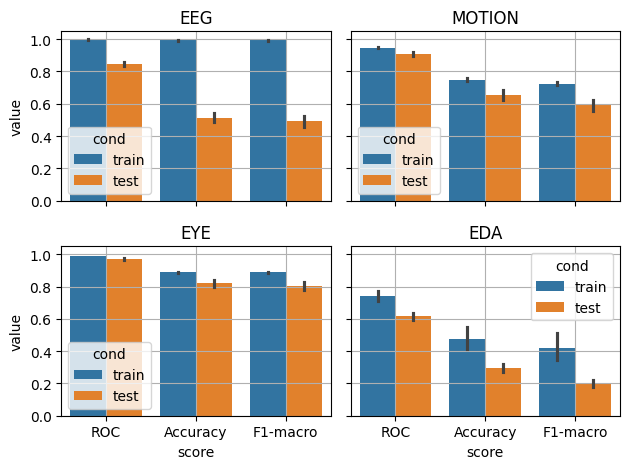

In [40]:
_, ax = plt.subplots(2,2, sharex=True, sharey=True)
r, c = 0,0
for key, score in scores.items():
    x = score.melt()
    x['score'] = [a.split('_')[1] for a in x.variable]
    x['cond'] = [a.split('_')[0] for a in x.variable]
    sns.barplot(data=x, x='score', y='value', hue='cond', ax=ax[r,c], hue_order=['train', 'test'])
    ax[r,c].grid()
    # ax[r,c].set_ylim(0.2)
    ax[r,c].set_title(key)
    c += 1
    if c == 2:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

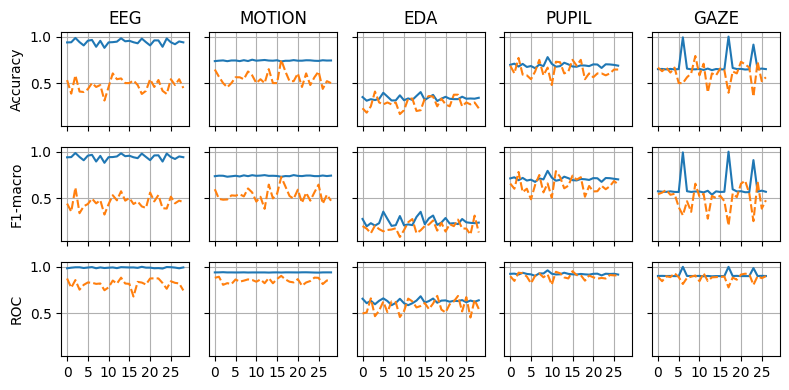

In [10]:
_, ax = plt.subplots(3, 5, figsize=(8, 4), sharex=True, sharey=True)
c = 0
for key, score in scores.items():
    ax[0, c].set_title(key)
    sns.lineplot(score[['train_Accuracy','test_Accuracy']], ax=ax[0, c])
    sns.lineplot(score[['train_F1-macro', 'test_F1-macro']], ax=ax[1, c])
    sns.lineplot(score[['train_ROC', 'test_ROC']], ax=ax[2, c])
    for i in range(3): 
        ax[i, c].legend().remove()
        ax[i, c].grid()
        ax[i, c].set_xticks(range(0, score.shape[0], 5))
    c += 1
    
ax[0, 0].set_ylabel('Accuracy')
ax[1, 0].set_ylabel('F1-macro')
ax[2, 0].set_ylabel('ROC')

# for i in range(2): ax[1, i].legend().remove()
plt.tight_layout()
plt.show()

In [45]:
clfs['EDA']['estimator'][25]

GridSearchCV(cv=KFold(n_splits=2, random_state=123456, shuffle=True),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('reduce_dim', 'passthrough'),
                                       ('classify', SVC(probability=True))]),
             n_jobs=10,
             param_grid=[{'classify__C': [0.1, 1, 5],
                          'classify__degree': [2, 3, 4, 5, 6],
                          'classify__gamma': [0.1, 0.01, 0.001],
                          'reduce_dim': [LinearDiscriminantAnalysis(),
                                         Neighb...
             refit='F1-macro', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'F1-macro': make_scorer(f1_score, response_method='predict', average=macro),
                      'Precision': make_scorer(precision_score, response_method='predict', average=macro),
                      'ROC': 'roc_auc_ovr',
                      'Recall': make_scorer(recall_score, response_method='predict', average=macro)})

In [15]:
for n, c in enumerate(clfs['EDA']['estimator']):
    print(n, c.best_estimator_)

0 Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', NeighborhoodComponentsAnalysis(n_components=3)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
1 Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', NeighborhoodComponentsAnalysis(n_components=3)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
2 Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
3 Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=25)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
4 Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', SelectKBest(k=30)),
                ('classify', SVC(C=5, degree=2, gamma=0.1, probability=True))])
5 Pipeline(steps=[('scaling', StandardScal

In [105]:
datafiles = {
    'EEG': '../trainning data/EEG_features_combined_mergedtw.csv',
        'MOTION': '../trainning data/motion_e4_features_combined.csv', #motion + e4 acc
        'EYE': '../trainning data/eye_features_combined_mergedtw.csv',
        'EDA': '../trainning data/EDA_features_combined_mergedtw.csv',}

In [67]:
# from sklearn.metrics import RocCurveDisplay

# display = RocCurveDisplay.from_predictions(
#     y_onehot_test[:, class_id],
#     y_score[:, class_id],
#     name=f"{class_of_interest} vs the rest",
#     color="darkorange",
#     plot_chance_level=True,
# )
# _ = display.ax_.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
# )

### AUC

In [82]:
mauc = motions['auc']
mauc

{'GNBayes': [array([0.36805556, 0.52893519, 0.36574074, 0.8125    ]),
  array([0.57638889, 0.57638889, 0.53703704, 0.6412037 ]),
  array([0.7662037 , 0.44444444, 0.62037037, 0.5625    ]),
  array([0.67592593, 0.57638889, 0.55324074, 0.58333333]),
  array([0.43287037, 0.53240741, 0.44328704, 0.53935185]),
  array([0.5162037 , 0.55555556, 0.81481481, 0.46990741]),
  array([0.32638889, 0.76157407, 0.64351852, 0.57407407]),
  array([0.55787037, 0.57407407, 0.4537037 , 0.58564815]),
  array([0.53472222, 0.69907407, 0.85185185, 0.61805556]),
  array([0.32407407, 0.48611111, 0.80787037, 0.5162037 ]),
  array([0.57638889, 0.54861111, 0.48842593, 0.53935185]),
  array([0.68981481, 0.4537037 , 0.39583333, 0.59953704]),
  array([0.71064815, 0.7962963 , 0.59722222, 0.63425926]),
  array([0.60416667, 0.69675926, 0.77546296, 0.70833333]),
  array([0.66435185, 0.46064815, 0.63657407, 0.6087963 ]),
  array([0.66666667, 0.54861111, 0.89814815, 0.625     ]),
  array([0.34027778, 0.59259259, 0.47916667, 

In [89]:
# pd.DataFrame(mauc)

def get_single(input_dict, item_idx=0):
    out = {}
    for (key, values) in input_dict.items():
        if key != 'PID':
            out.update({key: [v[item_idx] for v in values]})
    out.update({'PID': input_dict['PID']})
    return out
    
motion_aucs = [pd.DataFrame(get_single(mauc, 0)),pd.DataFrame(get_single(mauc, 1)),\
                                                             pd.DataFrame(get_single(mauc, 2)),pd.DataFrame(get_single(mauc, 3))]
motion_aucs

[     GNBayes       SVM        RF       KNN       XGB   PID
 0   0.368056  0.717593  0.472222  0.472222  0.500000  PA11
 1   0.576389  0.594907  0.563657  0.506944  0.593750  PA12
 2   0.766204  0.678241  0.611111  0.498843  0.688657  PA13
 3   0.675926  0.650463  0.593750  0.652778  0.592593  PA17
 4   0.432870  0.386574  0.467593  0.488426  0.420139  PA18
 5   0.516204  0.694444  0.559028  0.582176  0.627315  PA19
 6   0.326389  0.331019  0.496528  0.497685  0.356481  PA20
 7   0.557870  0.652778  0.379630  0.424769  0.603009  PA21
 8   0.534722  0.469907  0.495370  0.484954  0.461806  PA22
 9   0.324074  0.333333  0.396991  0.332176  0.402778  PA26
 10  0.576389  0.567130  0.472222  0.568287  0.524306  PA27
 11  0.689815  0.458333  0.472222  0.574074  0.515046  PA29
 12  0.710648  0.740741  0.737269  0.746528  0.771991  PA30
 13  0.604167  0.581019  0.548611  0.587963  0.456019  PA31
 14  0.664352  0.576389  0.533565  0.513889  0.387731  PA32
 15  0.666667  0.641204  0.547454  0.587

/tmp/ipykernel_22201/2027984703.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(motion_aucs[i]['PID'].values)


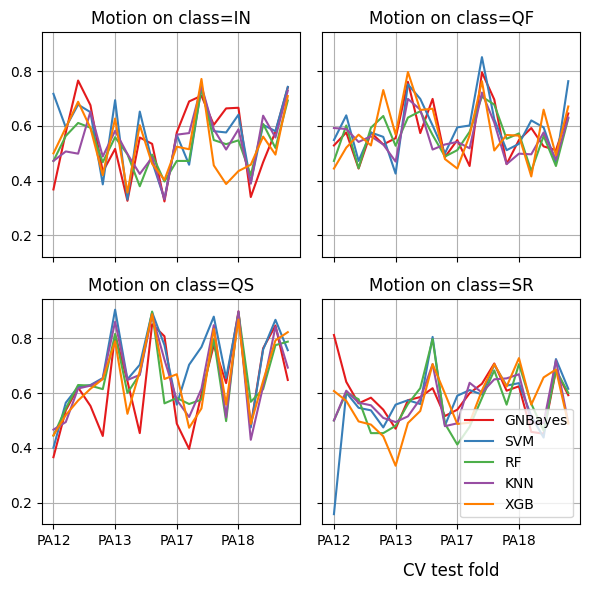

Model Average scores:
 [GNBayes    0.56
SVM        0.57
RF         0.53
KNN        0.54
XGB        0.53
dtype: float64, GNBayes    0.58
SVM        0.60
RF         0.56
KNN        0.56
XGB        0.58
dtype: float64, GNBayes    0.63
SVM        0.71
RF         0.65
KNN        0.66
XGB        0.65
dtype: float64, GNBayes    0.59
SVM        0.57
RF         0.56
KNN        0.57
XGB        0.57
dtype: float64]
Overall Average scores: 0.5881452546296296


In [150]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), sharex=True, sharey=True)

r, c = 0,0
for i in [0, 1,2,3]:
    sns.lineplot(
        data=motion_aucs[i],
        dashes=False,
        palette="Set1",
        # marker="o",
        # alpha=0.5,
        ax=ax[r, c],
    )
    ax[r,c].set_title(f'Motion on class={target_set1[i]}')
    ax[r,c].legend().remove()
    ax[r,c].grid()
    c+=1
    if c == 2:
        r +=1 
        c = 0

ax[1,1].tick_params(bottom=True, labelbottom=True)
ax[1,1].set_xticklabels(motion_aucs[i]['PID'].values)
ax[1,1].set_xlabel("CV test fold", size=12, labelpad=10)
ax[1,1].set_ylabel("Model AUC", size=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


print('Model Average scores:\n', [d.iloc[:, :-1].mean().round(2) for d in motion_aucs])
print('Overall Average scores:', ([d.iloc[:, :-1].mean().values for d in motion_aucs]))

In [106]:
df = pd.read_csv('../trainning data/EEG_features_combined_mergedtw.csv')
df

,PID,task,durations,stage,Topic,Input,Output,EEG:hjorthActivity_AF3,EEG:hjorthActivity_F7,EEG:hjorthActivity_F3,...,EEG:intra_asym_right_alpha,EEG:inter_asym_beta,EEG:intra_asym_left_beta,EEG:intra_asym_right_beta,EEG:inter_asym_theta,EEG:intra_asym_left_theta,EEG:intra_asym_right_theta,EEG:inter_asym_lowgamma,EEG:intra_asym_left_lowgamma,EEG:intra_asym_right_lowgamma
0,PA11,1,3.936,SPEAK,353.0,LISTEN,SPEAK,785.780106,49.479256,126.260172,...,0.392544,0.368817,6.729522,0.689889,0.840464,0.970164,0.489132,0.272568,13.081256,1.722769
1,PA11,1,10.118,QF,353.0,LISTEN,SPEAK,427.114145,50.669085,88.451331,...,0.318010,0.359538,4.398954,0.856759,1.456429,0.854931,0.323453,0.225824,12.073157,1.512151
2,PA11,1,23.388,QS,353.0,LISTEN,SPEAK,1136.497574,195.501881,170.133763,...,0.302026,0.333669,4.656426,0.783695,1.306044,0.936359,0.239976,0.260788,9.827925,1.423949
3,PA11,1,37.991,IN,353.0,LISTEN,SPEAK,375.118397,106.991222,98.565760,...,0.343234,0.328325,5.709905,0.886147,1.769401,0.686517,0.250314,0.229287,11.891535,1.610512
4,PA11,1,59.662,LISTEN,353.0,LISTEN,SPEAK,663.192094,535.374309,135.477207,...,0.382242,0.357651,5.439028,0.791553,1.098339,1.291465,0.317995,0.326517,9.474036,1.467911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,PA9,9,19.834,TYPE,314.0,READ,TYPE,202.834280,89.861637,348.548134,...,0.770073,1.166767,0.410521,1.158938,0.996202,0.580457,0.719256,1.501937,0.436072,1.951237
1436,PA9,9,24.156,QS,314.0,READ,TYPE,267.166511,98.556089,452.646553,...,0.769373,1.033702,0.385537,1.236025,0.895960,0.538168,0.709627,1.514603,0.421977,1.880335
1437,PA9,9,27.662,IN,314.0,READ,TYPE,37.546698,36.027258,58.902451,...,0.650623,1.490454,0.483423,1.200262,1.203395,0.577417,0.921857,2.347022,0.694720,3.301122
1438,PA9,9,41.734,READ,314.0,READ,TYPE,55.962328,27.735952,81.861991,...,0.652856,1.186432,0.435357,1.121123,1.218531,0.501400,0.886565,2.034630,0.499641,2.915524


In [16]:
models = ['GNBayes', 'SVM', 'RF', 'KNN', 'XGB']
data_types = ['EYE', 'EDA', 'EEG', 'MOTION']

models = []
for data_type in data_types:
    m1 = glob.glob(f'models/*_2024-08_*/SVM(4)-{data_type}-22_*', recursive=True)[0]
    m1 = pickle.load(open(m1, 'rb'))
    models.append(m1)
    print(data_type, m1.best_params_)

EYE {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
EDA {'C': 5, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
EEG {'C': 0.1, 'degree': 6, 'gamma': 0.01, 'kernel': 'rbf'}
MOTION {'C': 5, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
for i in range(len(data_types)):
    print(data_types[i], models[i].best_score_, models[i].n_features_in_)

EYE 0.8931718369025855 3
EDA 0.6698278750662334 15
EEG 0.9830891016678054 3
MOTION 0.91918655354233 3


In [105]:
target_name = 'stage'
target_set1 = ['IN','QF', 'QS', 'SR',]
# target_set2 = ['IN', 'QF', 'LISTEN','READ', 'TYPE', 'SPEAK']

In [ ]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)

In [ ]:
import itertools

In [146]:
## check EEG feature selection

In [153]:
file = 'models/SVM(4)-EEG-selectfeatures.pkl'
model = pickle.load(open(file, 'rb'))
len(model)

31

In [155]:
model[0].keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro'])

In [158]:
scores = ['test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro']
results = []
for m in model:
    results.append([m[ss].mean() for ss in scores])
results = pd.DataFrame(results, columns=scores)
results

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
0,0.678609,0.741847,0.410227,0.491205,0.397185,0.484680
1,0.681873,0.772442,0.419034,0.522715,0.406028,0.518300
2,0.691894,0.804210,0.416288,0.559986,0.407892,0.558123
3,0.714038,0.832646,0.426326,0.599789,0.419900,0.599760
4,0.721681,0.857413,0.447917,0.639201,0.440928,0.639749
5,0.730241,0.881034,0.448295,0.678398,0.441427,0.679929
6,0.729077,0.902799,0.458807,0.715721,0.454180,0.717408
7,0.735553,0.920985,0.453598,0.747621,0.447925,0.749264
8,0.739382,0.937961,0.448295,0.782392,0.441398,0.783802
9,0.745240,0.953013,0.450473,0.815294,0.443434,0.816630


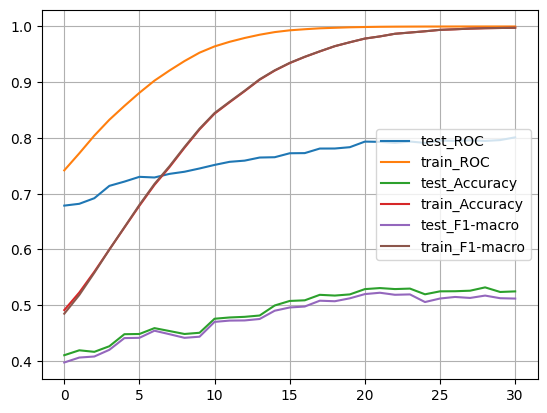

In [161]:
results.plot()
plt.grid()
plt.show()